# Specify Path of MINE_net to load

In [21]:
import os
from os import path as p

Use dropdown for the following instead
- For consistency with the naming convention, change 'Mixed Gaussian' to 'Mixed_Gaussian'
- For consistency with the parameter name in the code, population_size to n_samples.

In [22]:
proj_path = p.dirname(p.abspath('MINE-Entropy'))
exp_path = p.join(proj_path, "results")
print(exp_path)

C:\Users\chung\Dropbox\GitHub\MINE-Entropy\results


In [23]:
batch_size=128
population_size=2048
sub_path = p.join(exp_path, "pop={}_batch={}".format(population_size, batch_size))
print(sub_path)

C:\Users\chung\Dropbox\GitHub\MINE-Entropy\results\pop=2048_batch=128


In [24]:
data_name="Mixed Gaussian"
vary_name="rho1"
vary_val=0.9
data_path = p.join(sub_path, "{}_{}={}".format(data_name, vary_name, vary_val))
print(data_path)

C:\Users\chung\Dropbox\GitHub\MINE-Entropy\results\pop=2048_batch=128\Mixed Gaussian_rho1=0.9


In [25]:
model_name="MINE_direct"
model_path = p.join(data_path, model_name)
print(model_path)

C:\Users\chung\Dropbox\GitHub\MINE-Entropy\results\pop=2048_batch=128\Mixed Gaussian_rho1=0.9\MINE_direct


Output directory to store plots

In [42]:
out_path = p.join(proj_path,'Output')
os.makedirs(p.join(proj_path,'Output'),exist_ok=True)

# Import minee and needed packages

In [26]:
import minee 
import torch

In [27]:
from minee import settings
MINE_dir = settings.model[model_name]['model']

# Load Mine_net

In [28]:
iter_num = 78125
mine_file = p.join(model_path, "checkpoint_iter={}.pt".format(iter_num))
MINE_dir.mine_net.load_state_dict(torch.load(mine_file))

# Specify data parameters

Allow the input of a random seed. Can use 0 as the default for our result, so there is no need to store the random seed.

In [31]:
#Default value of datasets are shown
#Data can also be user-specified
def generate_dataset(selected_data):
    if (selected_data == 'Mixed Gaussian'):
        dataset = minee.data.mix_gaussian.MixedGaussian(n_samples=400, mean1=0, mean2=0, rho1=0.9, rho2=-0.9, mix=0.5, theta=0)
    elif (selected_data == 'Gaussian'):
        dataset = minee.data.gaussian.Gaussian(n_samples=200, mean1=0, mean2=1, rho=0.8)
    elif (selected_data == 'Mixed Uniform'):
        dataset = minee.data.mix_uniform.MixedUniform(mix=0.5, width_a=10, width_b=10, n_samples=200)
    elif (selected_data == 'Self-Defined'):
        pass
        #define custom dataset, n by 2 matrix with n being number of samples
        #can also define ground truth
        #dataset = 
    return dataset
gaus = generate_dataset('Gaussian')
X = gaus.data

# Load Train and valid mi_lb curve

In [32]:
import numpy as np
MINE_dir.avg_train_mi_lb = np.loadtxt(p.join(model_path, "avg_train_mi_lb.txt"))
MINE_dir.avg_valid_mi_lb = np.loadtxt(p.join(model_path, "avg_valid_mi_lb.txt"))
# MINE_dir.avg_train_loss = np.loadtxt(p.join(model_path, "avg_train_loss.txt"))
# MINE_dir.avg_test_loss = np.loadtxt(p.join(model_path, "avg_test_loss.txt"))

# Generate figure

In [34]:
from sklearn.model_selection import train_test_split
MINE_dir.X_train, MINE_dir.X_test = train_test_split(X, test_size=0.35, random_state=0)
MINE_dir.ground_truth = gaus.ground_truth
mi_lb = MINE_dir.forward_pass(MINE_dir.X_test).item()
MINE_dir.savefig(X, mi_lb, suffix="_test2")

Generate pgf plot instead of png for inclusion in LaTeX. Also present the plots in jupyter notebook.
See https://matplotlib.org/users/pgf.html

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.use("Agg")
pgf_with_rc_fonts = {
    "font.family": ['serif'],
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": [], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)

Text(0.5, 1.0, 'scatter plot of data')

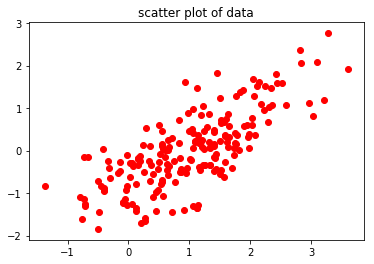

In [66]:
data_plot = plt.figure()
plt.scatter(X[:,1], X[:,0], color='red', marker='o')
plt.title('scatter plot of data')

In [67]:
data_plot.savefig(p.join(out_path,'data.pdf'),bbox_inches='tight')
data_plot.savefig(p.join(out_path,'data.pgf'))